In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals


import tensorflow_datasets as tfds
import tensorflow as tf

In [2]:
# Get the data
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

In [3]:
tokenizer = info.features['text'].encoder

In [4]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_dataset))

In [5]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          523840    
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               66048     
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 598,209
Trainable params: 598,209
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

NUM_EPOCHS = 10
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset, batch_size=32, steps_per_epoch=20)

Epoch 1/10
20/20 [==============================] - 174s 9s/step - loss: 0.6932 - accuracy: 0.4984 - val_loss: 0.6925 - val_accuracy: 0.5491
Epoch 2/10
20/20 [==============================] - 171s 9s/step - loss: 0.6906 - accuracy: 0.5305 - val_loss: 0.6749 - val_accuracy: 0.6251
Epoch 3/10
20/20 [==============================] - 189s 10s/step - loss: 0.6670 - accuracy: 0.6164 - val_loss: 0.6312 - val_accuracy: 0.6744
Epoch 4/10
20/20 [==============================] - 175s 9s/step - loss: 0.5989 - accuracy: 0.6859 - val_loss: 0.5297 - val_accuracy: 0.7466
Epoch 5/10
20/20 [==============================] - 176s 9s/step - loss: 0.5366 - accuracy: 0.7453 - val_loss: 0.5171 - val_accuracy: 0.7632
Epoch 6/10
20/20 [==============================] - 179s 9s/step - loss: 0.4894 - accuracy: 0.7688 - val_loss: 0.4709 - val_accuracy: 0.7910
Epoch 7/10
20/20 [==============================] - 178s 9s/step - loss: 0.5012 - accuracy: 0.7711 - val_loss: 0.5085 - val_accuracy: 0.7550
Epoch 8/10
2

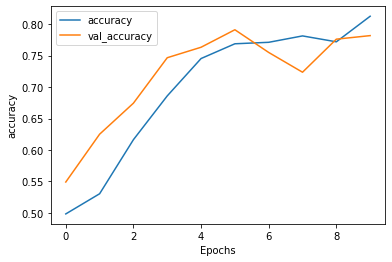

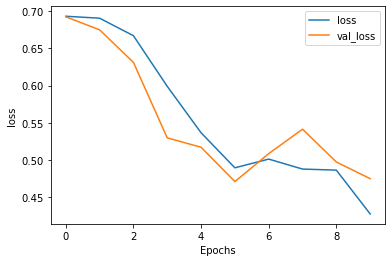

In [8]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [9]:
# Multi Layer

In [10]:
model_multi = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_multi.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 64)          523840    
_________________________________________________________________
bidirectional_1 (Bidirection (None, None, 128)         66048     
_________________________________________________________________
bidirectional_2 (Bidirection (None, 64)                41216     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 635,329
Trainable params: 635,329
Non-trainable params: 0
_________________________________________________________________


In [12]:
model_multi.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# this takes ages to train
NUM_EPOCHS = 10
history_multi = model_multi.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset, batch_size=32, steps_per_epoch=20)

Epoch 1/10
20/20 [==============================] - ETA: 0s - loss: 0.6907 - accuracy: 0.5312 

KeyboardInterrupt: 

In [ ]:
plot_graphs(history_multi, 'accuracy')
plot_graphs(history_multi, 'loss')